In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('wine.csv')
#this function will provide the descriptive statistics of the dataset.(only int value)
dataset.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


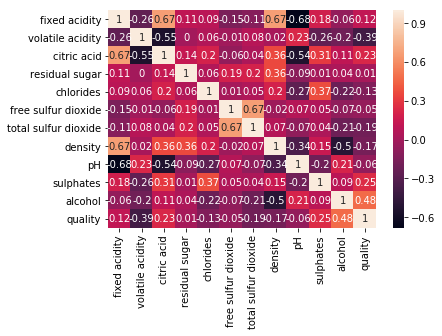

In [3]:
#There are 4 independent variables and 1 dependent variable. So we need to see what is needed most importantly using the Correlation Matrix.
import seaborn as sns
#Other methods like Back Propagation/ Forward Propagation can be used. But Correlation Matrix is best for most speedy analysis.
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


In [4]:
#determine X and y variables(form correlation matrix this values as independent variables)
X = dataset.iloc[:, [0,2,3,4,5,7,8,9,10,11]].values
y = dataset.iloc[:, [-1]].values


In [5]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)


In [6]:
#split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [7]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha =0.01, random_state = 0, learning_rate = 'invscaling' , eta0 = 0.0001)
regressor.fit(X_train, y_train)

/Users/karthikeyanthanigai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [8]:
#predicting the value
y_pred = regressor.predict(X_test)


In [9]:
#r2 result
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination = ",r_squared)

Coefficient of Determination =  0.650180120125514


In [10]:
#rmse and r2 results for training set
from sklearn.metrics import r2_score , mean_squared_error

rmse_train = (np.sqrt(mean_squared_error(y_train, regressor.predict(X_train) )))
r_squared_train = r2_score(y_train , regressor.predict(X_train))
print("R squared for the training set")
print("---------------------------------")
print(r_squared_train)
print("---------------------------------")
print("RMSEfor the training set")
print("---------------------------------")
print(rmse_train)

R squared for the training set
---------------------------------
0.6962293764004883
---------------------------------
RMSEfor the training set
---------------------------------
0.451489583235891


In [11]:
#rmse and r2 results for test set
rmse_test = (np.sqrt(mean_squared_error(y_test, regressor.predict(X_test) )))
r_squared_test = r2_score(y_test , regressor.predict(X_test))
print("R squared for the testing set")
print("---------------------------------")
print(r_squared_test)
print("---------------------------------")
print("RMSEfor the testing set")
print("---------------------------------")
print(rmse_test)

R squared for the testing set
---------------------------------
0.650180120125514
---------------------------------
RMSEfor the testing set
---------------------------------
0.4475021970773838


In [12]:
#The RMSE and the R squared for the test and the training set is almost the same , which shows that our model has not done any overfitting. The model can be well improved by going to more Algorithms like Polynomial, SVMs , foresting and Boosting Algorithms.